# Les Misrebles Network Analysis

Source: http://www-personal.umich.edu/~mejn/netdata/ and http://networkdata.ics.uci.edu/data/lesmis/
Code adopted from: https://github.com/networkx/notebooks

Citation: Les Miserables: coappearance network of characters in the novel Les Miserables. Please cite **D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)**.

In [18]:
%matplotlib inline

from operator import itemgetter
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from io import StringIO
from pydotplus import graph_from_dot_data
import matplotlib.image as mpimg

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
DATA_DIR="../data"
INPUT_NETWORK=os.path.join(DATA_DIR, "lesmis","lesmis.gml")
INPUT_NETWORK

'../data/lesmis/lesmis.gml'

## Reading the GML format

Please read the following about the GML format for storing networks
http://networkx.readthedocs.io/en/networkx-1.10/reference/readwrite.gml.html#format

In [4]:
G = nx.read_gml(INPUT_NETWORK)
#nx.write_gml(G, "../data/lesmis/lesmis.paj.gml")

In [5]:
df_node_degree = pd.DataFrame(list(dict(G.degree()).items()), columns=["node_name", "degree"])

In [6]:
df_node_degree.sort_values("degree", ascending=False).head(10)

,node_name,degree
10,Valjean,36
33,Gavroche,22
36,Marius,19
20,Javert,17
18,Thenardier,16
16,Fantine,15
37,Enjolras,15
38,Bossuet,13
62,Courfeyrac,13
69,Joly,12


In [7]:
print("radius: {:d}\n".format(nx.radius(G)))
print("diameter: {:d}\n".format(nx.diameter(G)))
print("eccentricity: {}\n".format(nx.eccentricity(G)))
print("center: {}\n".format(nx.center(G)))
print("periphery: {}\n".format(nx.periphery(G)))
print("density: {:f}".format(nx.density(G)))

radius: 3

diameter: 5

eccentricity: {'Myriel': 4, 'Napoleon': 5, 'MlleBaptistine': 4, 'MmeMagloire': 4, 'CountessDeLo': 5, 'Geborand': 5, 'Champtercier': 5, 'Cravatte': 5, 'Count': 5, 'OldMan': 5, 'Valjean': 3, 'Labarre': 4, 'Marguerite': 4, 'MmeDeR': 4, 'Isabeau': 4, 'Gervais': 4, 'Fantine': 4, 'MmeThenardier': 4, 'Thenardier': 3, 'Cosette': 4, 'Javert': 3, 'Fauchelevent': 4, 'Bamatabois': 4, 'Simplice': 4, 'Scaufflaire': 4, 'Woman1': 4, 'Judge': 4, 'Champmathieu': 4, 'Brevet': 4, 'Chenildieu': 4, 'Cochepaille': 4, 'Woman2': 4, 'MotherInnocent': 4, 'Gavroche': 3, 'Gillenormand': 4, 'MlleGillenormand': 4, 'Marius': 3, 'Enjolras': 3, 'Bossuet': 3, 'Gueulemer': 3, 'Babet': 3, 'Claquesous': 4, 'Montparnasse': 3, 'Toussaint': 4, 'Tholomyes': 4, 'Listolier': 5, 'Fameuil': 5, 'Blacheville': 5, 'Favourite': 5, 'Dahlia': 5, 'Zephine': 5, 'Perpetue': 5, 'Eponine': 4, 'Anzelma': 4, 'Magnon': 5, 'Pontmercy': 4, 'Boulatruelle': 4, 'Brujon': 4, 'LtGillenormand': 4, 'Gribier': 5, 'MmePontmercy': 5

## Connected components

In [10]:
connected_components = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
print("{} connected components found.".format(len(connected_components)))

1 connected components found.


## Drawing the graph

/home/napsternxg/anaconda3/envs/get17_sna/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/napsternxg/anaconda3/envs/get17_sna/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/napsternxg/anaconda3/envs/get17_sna/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/napsternxg/anaconda3/envs/get17_sna/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: 

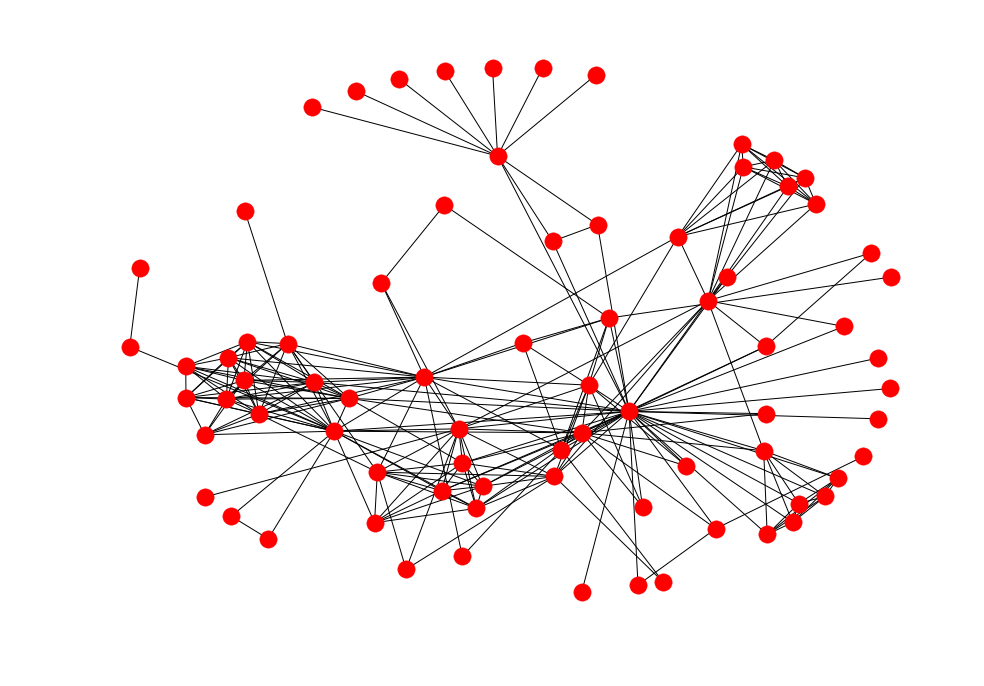

In [8]:
nx.draw(G)

(-0.10401004619651229, 1.0945819147347244, -0.10500000000000001, 1.105)

/home/napsternxg/anaconda3/envs/get17_sna/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


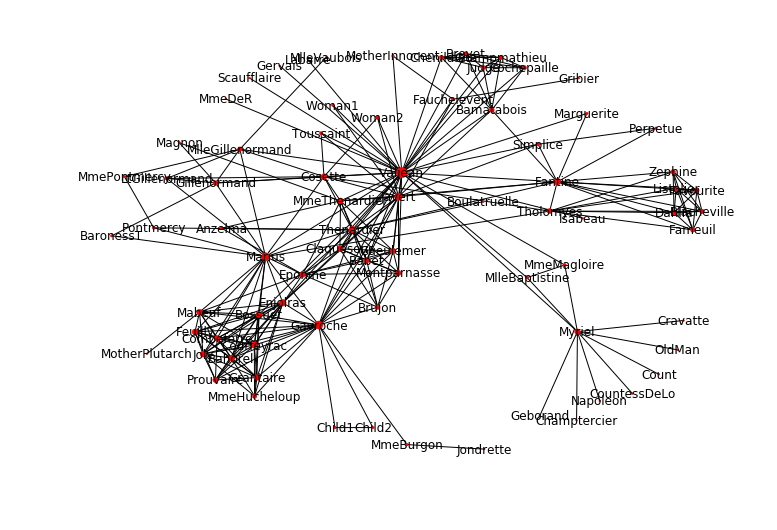

In [10]:
fig, ax = plt.subplots(1,1)
nx.draw_networkx(
    G, with_labels=True,
    node_size=[x[1]*3 for x in G.degree_iter()],
    pos=nx.spring_layout(G),
    ax=ax
)
ax.axis("off")

In [19]:
def show_graph(G, file_path):
    dotfile = StringIO()
    nx.drawing.nx_pydot.write_dot(G, dotfile)
    graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    i = mpimg.imread(file_path)
    plt.imshow(i)

/home/napsternxg/anaconda3/envs/get17_sna/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


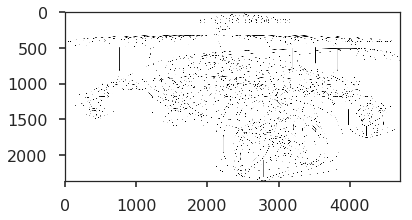

In [20]:
show_graph(G, "../output/lesmis.png")